In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
import tweets_utils
import importlib
from collections import Counter
import plotly.graph_objects as go

%autosave 3600

Autosaving every 3600 seconds


# Indice
- [Bot activity](#activity)
- [Bot - Conspiracy score - Community](#bcc)
- [Collecting data](#collecting)
- [Hashtags](#hashtags)
- [Process domain](#domain)

In [7]:
path = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/")
df = pd.read_csv(path[0] + "bots_tweets.csv", lineterminator="\n", low_memory=False)

In [8]:
df

,id,id_str,user_id,user_screen_name,text,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,...,rt_user_id,rt_user_screen_name,quoted_status_id,quoted_status_text,quoted_status_created_at,quoted_user_id,quoted_user_created_at,hashtags,user_mentions,urls
0,1219755586272813057,1.219756e+18,8.765581e+17,Norberta36,BREAKING from @CNN - CDC expected to announce ...,NaN,NaN,NaN,NaN,NaN,...,5.820859e+07,MatthewHilk,NaN,NaN,NaN,NaN,NaN,[],"[{'screen_name': 'MatthewHilk', 'name': 'Matth...",[]
1,1219762670733127680,1.219763e+18,9.970908e+17,Pissed_Woman,BREAKING from @CNN - CDC expected to announce ...,NaN,NaN,NaN,NaN,NaN,...,5.820859e+07,MatthewHilk,NaN,NaN,NaN,NaN,NaN,[],"[{'screen_name': 'MatthewHilk', 'name': 'Matth...",[]
2,1219786815445635072,1.219787e+18,2.505330e+07,FortuneMagazine,The CDC says the deadly coronavirus from China...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],"[{'url': 'https://t.co/2FVgxuZqSw', 'expanded_..."
3,1219815455759597569,1.219815e+18,4.255807e+08,jurylady5,Ahhh... the manufactured CORONAVIRUS is on its...,NaN,NaN,NaN,NaN,NaN,...,3.331666e+09,talialikeitis,NaN,NaN,NaN,NaN,NaN,[],"[{'screen_name': 'talialikeitis', 'name': 'Tal...",[]
4,1219843899507793920,1.219844e+18,1.009598e+18,VirginiaLoughn1,@hughhewitt While @hughhewitt celebrates the #...,NaN,NaN,NaN,NaN,NaN,...,1.468188e+09,MichaelWRader,NaN,NaN,NaN,NaN,NaN,"[{'text': 'coronavirus', 'indices': [64, 76]}]","[{'screen_name': 'MichaelWRader', 'name': 'Mic...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730478,1264052827548082176,1.264053e+18,1.924774e+08,Jeannie_Hartley,A deadly lesson in failed leadership: Texas le...,NaN,NaN,NaN,NaN,NaN,...,3.428633e+08,BetoORourke,NaN,NaN,NaN,NaN,NaN,[],"[{'screen_name': 'BetoORourke', 'name': ""Beto ...",[]
730479,1261967030674231296,1.261967e+18,2.526684e+08,jeromethegnome,Marr didn't show the People front page on the ...,NaN,NaN,NaN,NaN,NaN,...,5.864205e+08,BriefcaseMike,NaN,NaN,NaN,NaN,NaN,[],"[{'screen_name': 'BriefcaseMike', 'name': 'Bri...",[]
730480,1256362361595801601,1.256362e+18,7.604784e+17,McnellisWilliam,This key detail is why Trump is failing at usi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],"[{'url': 'https://t.co/rVJgPQI6oq', 'expanded_..."
730481,1262561736739237888,1.262562e+18,2.712489e+09,dancindoti,"At least 18,873 new coronavirus cases and 808 ...",NaN,NaN,NaN,NaN,NaN,...,7.592510e+05,CNN,NaN,NaN,NaN,NaN,NaN,[],"[{'screen_name': 'CNN', 'name': 'CNN', 'id': 7...",[]


### Bot activity
<a id="activity"/>

In [9]:
df_split = tweets_utils.split_df(df)

Number of total tweets: 730483
Number of original tweets: 310406
Number of retweets: 384562
Number of replies: 21153
Number of quotes: 15133
Number of original_tweets: 42.49% of total tweets
Number of retweets: 52.64% of total tweets
Number of replies: 2.9% of total tweets
Number of quotes: 2.07% of total tweets
Check sum == len(tweets):  False


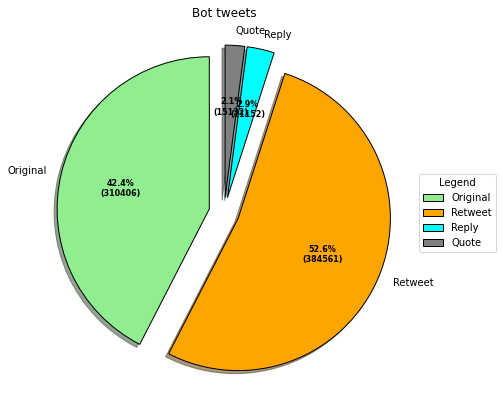

In [12]:
original = df_split["original"]
quote = df_split["quote"]
retweet = df_split["retweet"]
reply = df_split["reply"]
mentions = df_split["original_mention"]
reply_status = df_split['reply_to_status']
retweet_original = df_split['rt_original']
retweet_reply = df_split['rt_in_reply']
retweet_mention = df_split['rt_mention']
quote_original = df_split['quote_original']
quote_reply = df_split['quote_reply']
quote_mention = df_split['quote_mention']
total_len = len(df) 
len_quote = len(quote)
len_original = len(original)
len_rt = len(retweet)
len_rp = len(reply)
len_mentions = len(mentions)
len_reply_status = len(reply_status)
len_retweet_original = len(retweet_original)
len_retweet_reply = len(retweet_reply)
len_retweet_mention = len(retweet_mention)
len_quote_original = len(quote_original)
len_quote_reply = len(quote_reply)
len_quote_mention = len(quote_mention)
tweets_utils.stats(total_len, len_original, len_rt, len_rp, len_quote)
tweets_utils.print_pie_chart4("Bot tweets", "Original", "Retweet", "Reply", "Quote", len_original, len_rt, len_rp, len_quote)

In [17]:
values = [len_original/total_len, len_rt/total_len, len_rp/total_len, len_quote/total_len]
labels = ["Original", "Retweet", "Reply", "Quote"]
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=values, x=labels, name="Bots"))
fig.update_layout(
    title="Differences between Bot activities",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()

### Bot - Conspiracy score - Community
<a id="bcc" />

#### Bot - Community

In [20]:
path_nt = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/rt_network/")[0]
# df_degree.to_csv(path_nt + "df_degree.csv", line_terminator="\n", index=False, encoding="utf-8")
# df_louvain.to_csv(path_nt + "df_louvian.csv", line_terminator="\n", index=False, encoding="utf-8")
df_degree = pd.read_csv(path_nt + "df_degree.csv", lineterminator="\n", low_memory=False)
df_louvain = pd.read_csv(path_nt + "df_louvian.csv", lineterminator="\n", low_memory=False)

In [23]:
# df_nt_bot = df_louvain.merge(df, how="left", left_on="name", right_on="user_screen_name")
x = df_nt_bot[df_nt_bot["user_screen_name"].notna()]

In [29]:
# x.columns
x = x.drop([ 'id', 'id_str', 'user_id', 'user_screen_name',
       'text', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'rt_created_at', 'rt_in_reply_to_status_id',
       'rt_in_reply_to_user_id', 'rt_id', 'rt_user_id', 'rt_user_screen_name',
       'quoted_status_id', 'quoted_status_text', 'quoted_status_created_at',
       'quoted_user_id', 'quoted_user_created_at', 'hashtags', 'user_mentions',
       'urls'], axis=1)
x = x.drop_duplicates(subset=['name'])

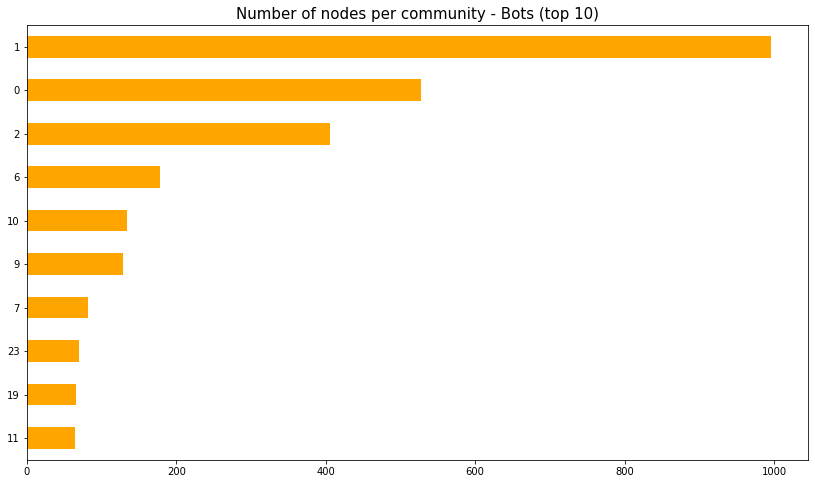

le prime 5 subcommunities sono il 73.94% del totale nella network
il numero di utenti è 3031


In [37]:
value = x["community"]
comm = pd.Series(value).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = comm[:10].plot(kind='barh', color='orange') 
ax.set_title('Number of nodes per community - Bots (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()
s = 0
for i in comm[:5]:
    s = s + i 
print(f"le prime 5 subcommunities sono il {round(s/comm.sum()*100,2)}% del totale nella network")
print(f"il numero di utenti è {comm.sum()}")

#### Bot - Conspiracy score

In [6]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/")[0]
bots = pd.read_csv(path + "bot_score.csv")
bots = bots.rename(columns={'user': 'user_screen_name'})
bots

,id,user_screen_name
0,1252818873578975232,matomecorona
1,1239490346691760128,Host24Space
2,1238684966063501313,CoronaVirusNFO
3,1203462567861084160,naija_reports
4,1245483551749005312,FR24NewsFrance
...,...,...
3867,1102793344785178625,MightyMousebb
3868,142018519,alej1477
3869,196110680,phen0480
3870,1175694002080886785,RemusJLupin2017


In [3]:
path = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/")[0]
credibility_url = pd.read_csv(path + "sum_of_urls_df_all_months_with_score.csv")
bots_w_credibility = bots[["user_screen_name"]].merge(
    credibility_url[["number_of_urls", "conspiracy_score", "user_screen_name"]], on="user_screen_name", how="left")

In [36]:
bots_w_credibility = bots_w_credibility[bots_w_credibility["conspiracy_score"].notna()]
bots_w_credibility = bots_w_credibility[bots_w_credibility["number_of_urls"]>=10] 
bots_w_credibility = bots_w_credibility.reset_index(drop=True)
bots_w_credibility

,user_screen_name,number_of_urls,conspiracy_score
0,naija_reports,3249.0,0.50
1,RadioQuo,600.0,0.00
2,lehimesa,60.0,0.06
3,JavelinaBlue,35.0,0.08
4,uhiiman,585.0,0.00
...,...,...,...
1438,BelaBenanua,41.0,0.00
1439,u3Y4BDE,39.0,0.00
1440,cmerfy,42.0,0.07
1441,teachertwit2,24.0,0.20


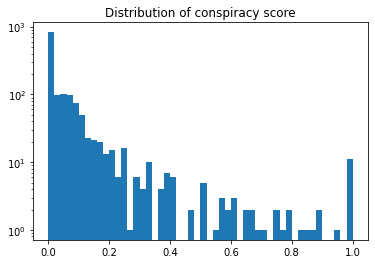

In [40]:
# # Plotting
plt.hist(bots_w_credibility["conspiracy_score"], 50)
plt.title("Distribution of conspiracy score")
plt.yscale('log', nonposy='clip')
plt.show()

### Collecting data
<a id="collecting"/>

In [7]:
cols = ["id", "id_str", "user_id", "user_screen_name", "text","in_reply_to_status_id",
        "in_reply_to_status_id_str" ,"in_reply_to_user_id" ,"in_reply_to_user_id_str" ,"in_reply_to_screen_name",
        "rt_created_at", "rt_in_reply_to_status_id", "rt_in_reply_to_user_id", "rt_id", "rt_user_id", "rt_created_at",
        "rt_user_screen_name", "quoted_status_id" ,"quoted_status_text" ,"quoted_status_created_at", "quoted_user_id",
        "quoted_user_created_at", "hashtags", "user_mentions", "urls"]
df = pd.DataFrame()
result = []
files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")

In [1]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols, True, bots["user_screen_name"]))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        df = df.append(lista[i]["df"])
    print(len(df))
    stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [13]:
df.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/bots_tweets.csv", line_terminator="\n", index=False, encoding="utf-8")

### Hashtags
<a id="hashtags"/>

In [30]:
hashtag = tweets_utils.hashtag_process_list(list(df["hashtags"]))

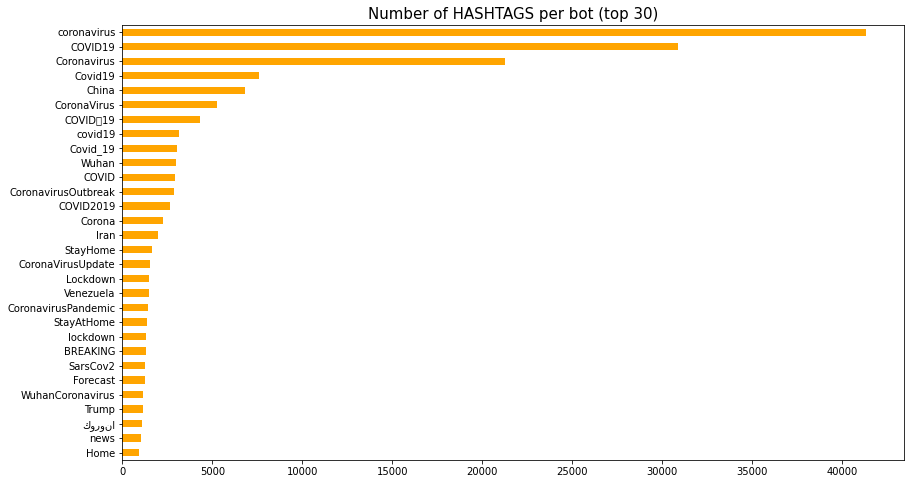

In [31]:
val = pd.Series(hashtag).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='orange', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of HASHTAGS per bot (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

### Process domain
<a id="domain"/>

In [33]:
# urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in df["urls"]]
# urls = list(filter(lambda num: num != "0", urls))
# urls = tweets_utils.remove_www(urls)
# urls

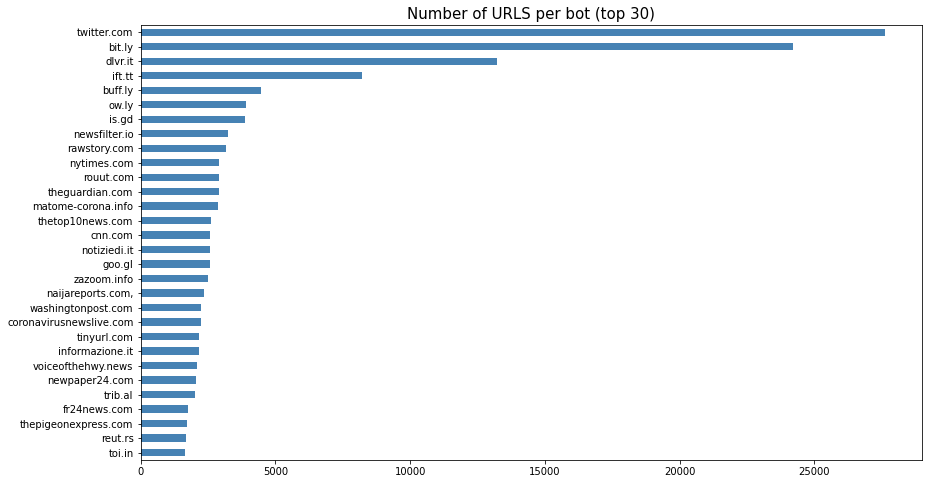

In [34]:
val = pd.Series(urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of URLS per bot (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()